In [2]:
import pandas as pd
dataset = pd.read_csv('/home/lab/lexchains/file.csv') 
dataset

/tmp/ipykernel_5379/2676492501.py:2: DtypeWarning: Columns (29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/home/lab/lexchains/file.csv')


,Sentiment,pos_1,pos_2,pos_3,pos_4,pos_5,pos_6,pos_7,pos_8,pos_9,...,pos_31,pos_32,pos_33,pos_34,pos_35,pos_36,pos_37,pos_38,pos_39,pos_40
0,negative,AUX,ADJ,SCONJ,PRON,AUX,VERB,PRON,NOUN,ADP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,negative,CCONJ,AUX,VERB,ADP,NOUN,NOUN,NOUN,ADV,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,negative,INTJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,negative,PRON,VERB,ADJ,NOUN,ADP,NOUN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,negative,VERB,VERB,NOUN,VERB,ADP,ADP,NOUN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461236,positive,NOUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2461237,positive,VERB,ADV,ADJ,VERB,ADJ,ADJ,NOUN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2461238,positive,AUX,PRON,ADJ,ADP,PRON,ADJ,NOUN,VERB,PRON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2461239,positive,ADJ,NOUN,ADP,PRON,NOUN,ADP,NOUN,NOUN,PROPN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
pos_tag_columns = [col for col in dataset.columns if col.startswith('pos')]
X_full = dataset[pos_tag_columns].astype(str)

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
label_encoders = {}
for col in X_full.columns:
    le = LabelEncoder()
    X_full[col] = le.fit_transform(X_full[col])  # Convert text to numerical
    label_encoders[col] = le

In [6]:
y = dataset['Sentiment']

results = []

In [7]:
from sklearn.metrics import accuracy_score, classification_report

n_positions_list = list(range(1, 41))

for n in n_positions_list:
    X = X_full.iloc[:, :n]

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest model
    model_rf = RandomForestClassifier()
    model_rf.fit(X_train, y_train)

    #remove ko pela tuning na
    # random_state=42, n_estimators=100
    # Make predictions
    y_pred_rf = model_rf.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_rf)

    # Store results
    results.append((n, accuracy))

    print(f"n_positions: {n}, Number of features: {X.shape[1]}")
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred_rf))

n_positions: 1, Number of features: 1
Accuracy: 0.5470625638650358
              precision    recall  f1-score   support

    negative       0.57      0.50      0.53    251750
    positive       0.53      0.60      0.56    240499

    accuracy                           0.55    492249
   macro avg       0.55      0.55      0.55    492249
weighted avg       0.55      0.55      0.55    492249

n_positions: 2, Number of features: 2
Accuracy: 0.5582398339051984
              precision    recall  f1-score   support

    negative       0.57      0.56      0.56    251750
    positive       0.55      0.56      0.55    240499

    accuracy                           0.56    492249
   macro avg       0.56      0.56      0.56    492249
weighted avg       0.56      0.56      0.56    492249

n_positions: 3, Number of features: 3
Accuracy: 0.5660427954145159
              precision    recall  f1-score   support

    negative       0.57      0.58      0.58    251750
    positive       0.56      0.55   

/usr/local/lib/python3.10/dist-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


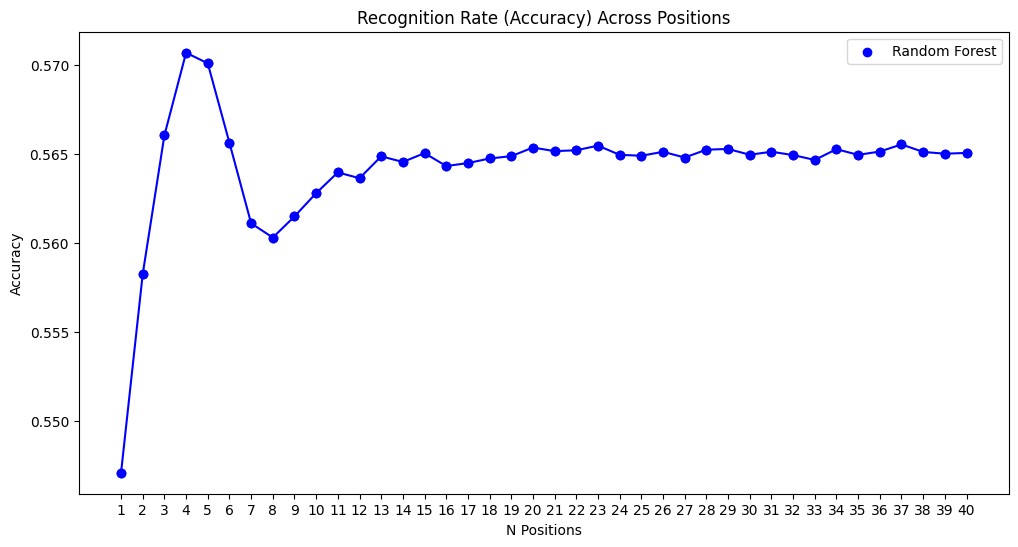

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6)) 
# Ensure positions are sorted correctly
positions, accuracies = zip(*sorted(results))  # Sort by positions just in case

plt.scatter(positions, accuracies, color='blue', label="Random Forest")  # Plot individual points
plt.plot(positions, accuracies, linestyle='-', marker='o', color='blue')  # Connect points properly

plt.title("Recognition Rate (Accuracy) Across Positions")
plt.xlabel("N Positions")
plt.ylabel("Accuracy")

plt.xticks(range(1, 41))  # Ensure all positions from 1 to 40 are displayed
plt.legend()
plt.grid(False)
plt.show()
